In [1]:
from cv import *
from utils import *
from ocr import *
from llm import *

In [143]:
file_name = '..\\photos\\photo_2023-07-28_15-59-26.jpg'
image = cv2.imread(file_name)

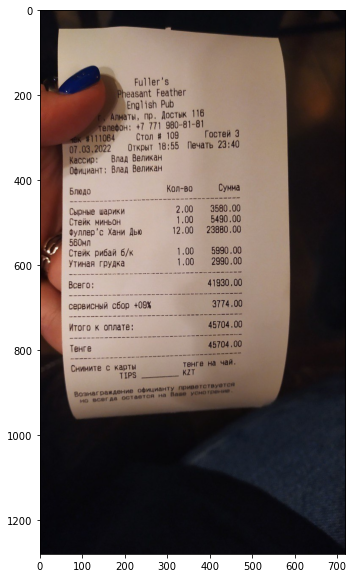

In [144]:
plot_rgb(image)

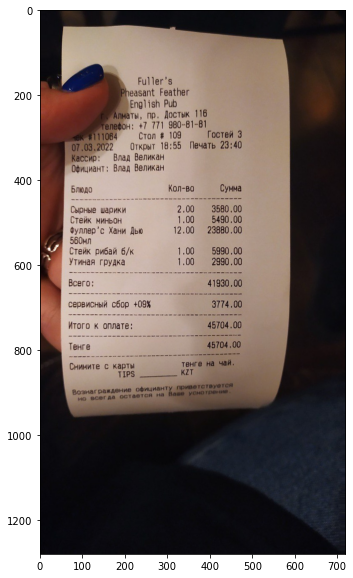

In [145]:
image = image_normalize(image)
angle, image = correct_skew(image)

plot_rgb(image)

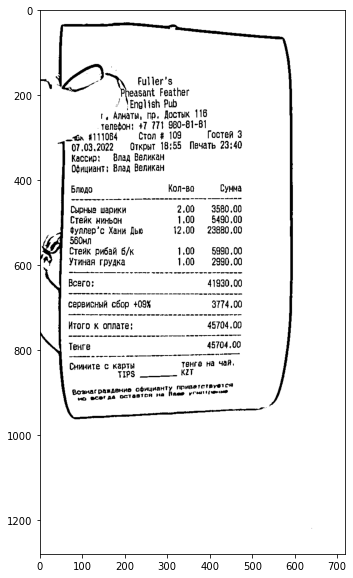

In [146]:

image = remove_noise(image)
image = bw_scanner(image)

plot_rgb(image)

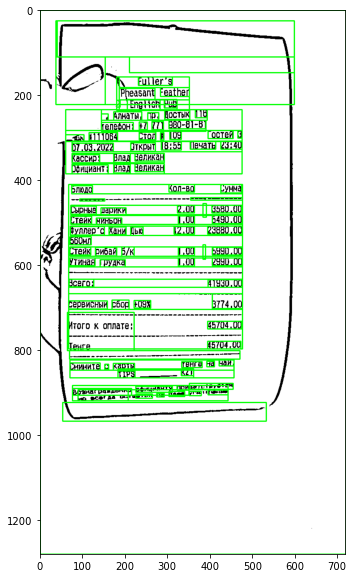

In [147]:
boxes = get_text_boxes(image)
plot_rgb(boxes)

In [113]:
extracted_text = image_to_string(image, lang='rus+eng')

In [114]:
extracted_text

'rere ИИ\n\nут WL Алматы ----- Запутзои! Алматы\n\nУл, Жандогова, 58\nана нуу\nПОВТОРНЫЙ ГОСТЕВОЙ СЧЕТ №1\nЗал: 14 Талдыкорган Стол: 142\nОткрыт: 11.07.2023 22:00 Заказ № 27\nОфициант: Абдурашитов Сагит\n\nPinot Grigio Бесога 4 47 980, 00\n\n750m1\n\nZatecky Gus 0.4 ml 2 1 790,00\nЧечил 1 1 295,00\nA\'SU 20001 5 975,00\nАджара Гуджу 1 22 995,00\nCarlsberg 0.4 ml 1 1 495,00\n16 на 20 1 3 595,00\nАс, Ас-Жаным 1 3 995,00\nZatecky биз 0.4 ml 7,500 $ 712,50\nХлебущек 1 695,00\nКальян 1 7 995,00\nPeps 2001 5 1 4715,00\nZatecky Gus 0.4 ml 7, 500 6 712,50\nНе Закуска 4 495,00\nЗамена Шиши 3 995,00\nКараске 1 час 10 000, 00\n\nКараоке 30 минут 2 500, 00\n\n128 700,00\nvane 10%" (+1 +12 870,00\n\nДОК: 141 570, 00\n20 000,00\n121 570,00\n\nПолная сумма:\nНадбавка "Об;\n08):\n\nИТОГО C BA\n\nMTOPO К OMABPE:\nСПАСИБО! ЖДЕМ BAC СНОВА!\n\n'

In [141]:
prompt = bild_prompt_for_gpt(extracted_text)

In [142]:
posison = gpt_process(prompt)

APIConnectionError: Error communicating with OpenAI: HTTPSConnectionPool(host='api.openai.com', port=443): Max retries exceeded with url: /v1/chat/completions (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000018C6881AD90>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
content_str_to_dict(posison)

In [118]:
posison

"'''\nPinot Grigio Бесога -> 47980\nZatecky Gus -> 1790\nЧечил -> 1295\nA'SU -> 975\nАджара Гуджу -> 22995\nCarlsberg -> 1495\n16 на 20 -> 3595\nАс, Ас-Жаным -> 3995\nZatecky биз -> 712.5\nХлебущек -> 695\nКальян -> 7995\nPeps -> 4715\nНе Закуска -> 495\nЗамена Шиши -> 995\nКараске -> 10000\nКараоке -> 2500\n'''"

6760

{'Total': 6760,
 'Items': [{'Name': 'ЛАГМАН ЦОМЯН', 'Price': '1290'},
  {'Name': 'ЛАГМАН ГУЙРУ', 'Price': '1290'},
  {'Name': 'ПЛОВ САМАРКАНДСКИЙ (ЗИГИ', 'Price': '1390'},
  {'Name': 'ПЛОВ ТАШКЕНТСКИЙ', 'Price': '1390'},
  {'Name': 'Лелешка тандырная', 'Price': '250'},
  {'Name': 'Компот', 'Price': '400'},
  {'Name': 'Чай танкентский', 'Price': '750'}]}